In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver

chromedriver_path = "/Users/AliBaba/downloads/chromedriver"

browser = webdriver.Chrome(chromedriver_path)

In [2]:
site = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/02j9z.2020-04-08*r/m/02j9z./m/0rh6k.2020-04-16;c:USD;e:1;ls:1w;sd:1;er:365396996.27095839.496776188.322408339;t:e'

In [3]:
browser.get(site)

In [4]:
browser.title

'Flights'

In [5]:
browser.save_screenshot('/Users/AliBaba/ml/flight_images/test_flights.png')

True

In [6]:
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [7]:
cards = soup.select('div[class*=info-container]')
cards[0]

<div class="uKOpFp4SF2X__info-container flt-body2"><div class="uKOpFp4SF2X__card-header"><h3 class="flt-subhead1">Rome</h3><div class="gws-flights__flex-box gws-flights__align-center"><img alt="Royal Air Maroc" class="uKOpFp4SF2X__airline-logo gws-flights-results__small-logo" height="16" src="//www.gstatic.com/flights/airline_logos/32px/AT.png" title="Royal Air Maroc" width="16"/><span class="gws-flights__flex-shrink gws-flights__ellipsize">1 stop</span><div class="gws-flights__separator"></div><span class="uKOpFp4SF2X__duration">13h 50m</span></div></div><div class="uKOpFp4SF2X__price-container"><div class="uKOpFp4SF2X__price-row"><span class="uKOpFp4SF2X__price flt-subhead2">$719</span></div></div></div>

In [8]:
#for card in cards:
#    print(card.select('h3')[0].text)
#    print(card.select('span[class*=price]')[0].text)
#    print('\n')

In [38]:
import datetime
from datetime import date, timedelta
from time import sleep
import numpy as np

start_day = '2020-03-29'
end_day = '2020-04-12'

start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')

fare_dict = {}

for i in range(4):
    start = str(start_date).split()[0]
    end = str(end_date).split()[0]
    
    fare_dict.update({start: {}})
    
    sats = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/09b69.' + \
    start + '*r/m/09b69./m/0rh6k.' + end + \
    ';c:USD;e:1;ls:1w;sd:1;t:e'
    
    sleep(np.random.randint(3,7))
    browser.get(sats)
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    cards = soup.select('div[class*=info-container]')
    
    for card in cards:
        city = card.select('h3')[0].text
        fare = card.select('span[class*=price]')[0].text
        fare_dict[start] = {**fare_dict[start], **{city: fare}}
        
    start_date = start_date + timedelta(days=1)
    end_date = end_date + timedelta(days=1)

In [2]:
def extract_price_info(start_day, end_day, front_url, middle_url, back_url):
    start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')
    
    fare_dict = {}
    
    for i in range(28):
        start = str(start_date).split()[0]
        end = str(end_date).split()[0]
    
        fare_dict.update({start: {}})
    
        variable_url = front_url + start + middle_url + end + back_url
    
        sleep(np.random.randint(3,7))
        browser.get(variable_url)
    
        soup = BeautifulSoup(browser.page_source, 'html.parser')
    
        cards = soup.select('div[class*=info-container]')
    
        for card in cards:
            city = card.select('h3')[0].text
            fare = card.select('span[class*=price]')[0].text
            fare_dict[start] = {**fare_dict[start], **{city: fare}}
        
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
    
    return fare_dict

In [12]:
fare_dict.keys()

dict_keys(['2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25'])

In [13]:
fare_dict['2020-04-02'].keys() #show the cities pulled for one day

dict_keys(['Prague', 'Moscow', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Saint Petersburg', 'Kraków', 'Sofia', 'Chisinau', 'Minsk', 'Riga', 'Vilnius', 'Lviv', 'Wrocław', 'Tallinn', 'Gdańsk', 'Odesa', 'Sochi', 'Bydgoszcz', 'Cluj-Napoca', 'Constanța', 'Debrecen', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Košice', 'Katowice', 'Samara', 'Kazan', 'Łódź', 'Makhachkala', 'Zaporizhzhia', 'Palanga', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu'])

In [14]:
def find_cheapest_day(flight_dict):
    cheapest = min(flight_dict.values())
    for key in flight_dict:
        if flight_dict[key] == cheapest:
            return key

In [15]:
def find_cheapest_fare(flight_dict):
    return min(flight_dict.values())

In [16]:
def print_cheapest(flight_dict, city_key):
    lowest_day = find_cheapest_day(flight_dict)
    lowest_fare = find_cheapest_fare(flight_dict)
    print("The cheapest flight to {} is on {} & it costs: {}".format(city_key, lowest_day, lowest_fare))

In [17]:
def generate_print_prices(city_key, fare_dict, print_prices=False):
    prices = {}
    for key in fare_dict:
        prices[key] = fare_dict[key][city_key]
        if print_prices:
            print(key, fare_dict[key][city_key])
    return prices

In [34]:
destinations = ['Sofia', 'Bucharest', 'Budapest']
prices_dict = {}
for x in destinations:
    dict_title = x + "_prices"
    dict_title = generate_print_prices(x, fare_dict, print_prices=False)
    prices_dict[x] = dict_title
    print_cheapest(dict_title, x)

The cheapest flight to Sofia is on 2020-03-31 & it costs: $612
The cheapest flight to Bucharest is on 2020-03-31 & it costs: $692
The cheapest flight to Budapest is on 2020-04-25 & it costs: $671


In [31]:
prices_dict.keys()

dict_keys(['Sofia', 'Bucharest', 'Budapest'])

In [32]:
city_key = 'Sofia'
for key in fare_dict:
    print(key, fare_dict[key][city_key])

2020-03-29 $645
2020-03-30 $654
2020-03-31 $612
2020-04-01 $616
2020-04-02 $612
2020-04-03 $645
2020-04-04 $647
2020-04-05 $675
2020-04-06 $651
2020-04-07 $612
2020-04-08 $612
2020-04-09 $645
2020-04-10 $645
2020-04-11 $652
2020-04-12 $675
2020-04-13 $650
2020-04-14 $614
2020-04-15 $612
2020-04-16 $614
2020-04-17 $614
2020-04-18 $657
2020-04-19 $673
2020-04-20 $650
2020-04-21 $612
2020-04-22 $612
2020-04-23 $612
2020-04-24 $612
2020-04-25 $657


In [21]:
def dictionary_cleaned(prices_dictionary):
    clean_prices = {}
    for country, results in prices_dictionary.items():
        country_dict = {}
        for day in results:
            country_dict[day] = (results[day].replace(',','').split('$')[1])
        clean_prices[country] = country_dict
    return clean_prices

In [22]:
clean_dictionary = dictionary_cleaned(prices_dict)

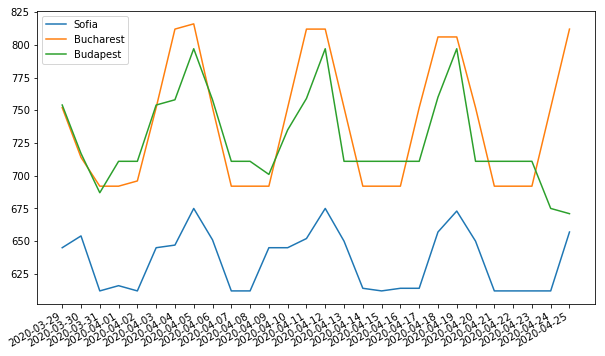

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))
for destination in destinations:
    dates = clean_dictionary[destination].keys()
    prices = [int(x) for x in clean_dictionary[destination].values()]
    plt.plot(dates, prices, label=destination)

fig.autofmt_xdate()
plt.legend(loc='best')

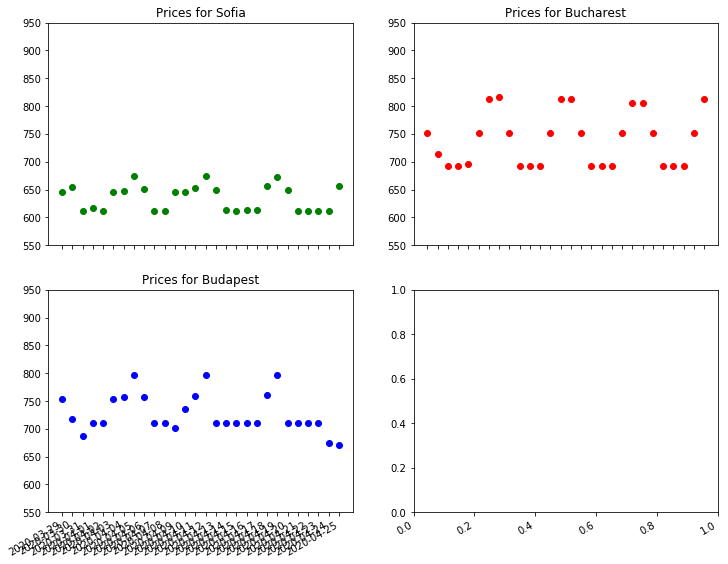

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize=(12,10))
axis_coord = [[0,0], [0,1], [1,0], [1,1]]
x = 0
colors = ['green', 'red', 'blue', 'orange']
for destination in destinations:
    coords = axis_coord[x]
    x_vals = clean_dictionary[destination].keys()
    y_vals = [int(x) for x in clean_dictionary[destination].values()]
    ax[coords[0], coords[1]].scatter(x_vals, y_vals, label = destination, color=colors[x])
    ax[coords[0], coords[1]].set_title("Prices for {}".format(destination))
    ax[coords[0], coords[1]].set_ylim([550,950])
    x += 1   
fig.autofmt_xdate()

In [11]:
western_europe_url = {}
western_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0852h.'
western_europe_url['middle_url'] = '*r/m/0852h./m/0rh6k.'
western_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

southern_europe_url = {}
southern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0250wj.'
southern_europe_url['middle_url'] = '*r/m/0250wj./m/0rh6k.'
southern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

eastern_europe_url = {}
eastern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/09b69.'
eastern_europe_url['middle_url'] = '*r/m/09b69./m/0rh6k.'
eastern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'


In [329]:
front = southern_europe_url['front_url']
middle = southern_europe_url['middle_url']
back = southern_europe_url['back_url']
southern_europe_prices = extract_price_info(start_day, end_day, front, middle, back)

In [331]:
front = western_europe_url['front_url']
middle = western_europe_url['middle_url']
back = western_europe_url['back_url']
western_europe_prices = extract_price_info(start_day, end_day, front, middle, back)

In [332]:
front = eastern_europe_url['front_url']
middle = eastern_europe_url['middle_url']
back = eastern_europe_url['back_url']
eastern_europe_prices = extract_price_info(start_day, end_day, front, middle, back)

((array([-1.96943887, -1.56054088, -1.31312287, -1.12721645, -0.97379083,
         -0.84042553, -0.72056163, -0.61026134, -0.50693827, -0.40877122,
         -0.31440035, -0.2227547 , -0.13294629, -0.04419962,  0.04419962,
          0.13294629,  0.2227547 ,  0.31440035,  0.40877122,  0.50693827,
          0.61026134,  0.72056163,  0.84042553,  0.97379083,  1.12721645,
          1.31312287,  1.56054088,  1.96943887]),
  array([614, 614, 614, 614, 614, 614, 614, 614, 614, 614, 614, 614, 620,
         645, 645, 645, 647, 647, 650, 650, 651, 652, 652, 659, 671, 675,
         675, 675])),
 (21.66794546593902, 636.6785714285714, 0.9142890807435384))

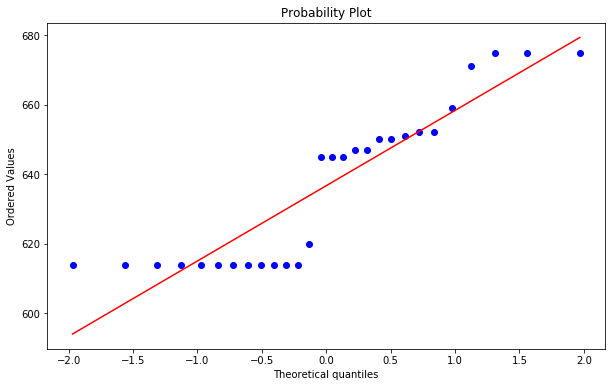

In [70]:
from scipy import stats
prices = [int(x) for x in list(clean_dictionary['Sofia'].values())]
fig, ax = plt.subplots(figsize=(10,6))
stats.probplot(prices, plot=plt)

Total Outliers: 0
Outlier Dates dict_keys([]) 

     R         Lambda
 1   1.71488   3.02338
 2   1.85001   3.00500
 3   2.02310   2.98566


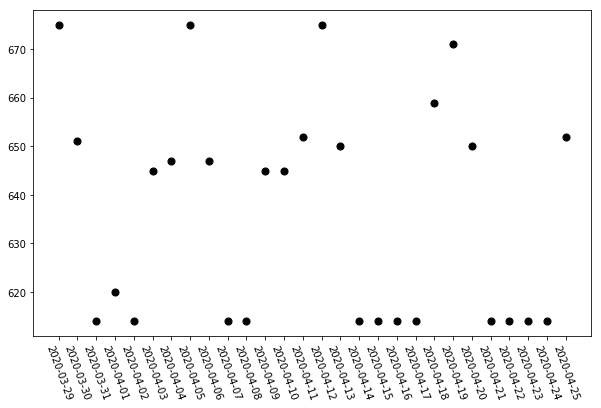

In [71]:
from PyAstronomy import pyasl 
 
r = pyasl.generalizedESD(prices, 3, 0.025, fullOutput=True) 
 
print('Total Outliers:', r[0]) 
 
out_dates = {} 
for i in sorted(r[1]): 
    out_dates.update({list(dates)[i]: list(prices)[i]}) 
 
print('Outlier Dates', out_dates.keys(), '\n') 
print('     R         Lambda') 
 
for i in range(len(r[2])): 
    print('%2d  %8.5f  %8.5f' % ((i+1), r[2][i], r[3][i])) 
 
fig, ax = plt.subplots(figsize=(10,6)) 
plt.scatter(dates, prices, color='black', s=50) 
ax.set_xticklabels(dates, rotation=-70); 
 
for i in range(r[0]): 
    plt.plot(r[1][i], prices[r[1][i]], 'rp')

Total Outliers: 0
Outlier Dates dict_keys([]) 

     R         Lambda
 1   2.13250   3.02338
 2   2.38142   3.00500
 3   2.74450   2.98566


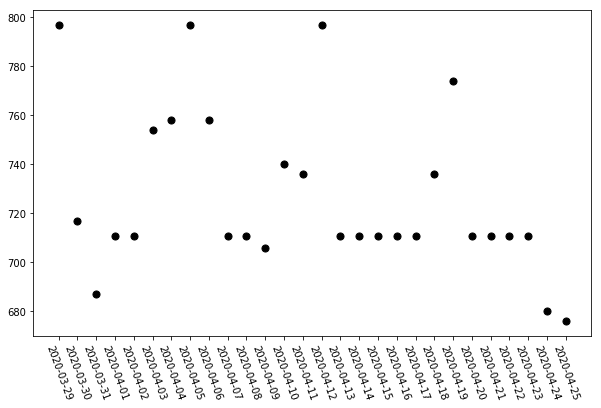

In [72]:
prices = [int(x) for x in list(clean_dictionary['Budapest'].values())]

r = pyasl.generalizedESD(prices, 3, 0.025, fullOutput=True) 
 
print('Total Outliers:', r[0]) 
 
out_dates = {} 
for i in sorted(r[1]): 
    out_dates.update({list(dates)[i]: list(prices)[i]}) 
 
print('Outlier Dates', out_dates.keys(), '\n') 
print('     R         Lambda') 
 
for i in range(len(r[2])): 
    print('%2d  %8.5f  %8.5f' % ((i+1), r[2][i], r[3][i])) 
 
fig, ax = plt.subplots(figsize=(10,6)) 
plt.scatter(dates, prices, color='black', s=50) 
ax.set_xticklabels(dates, rotation=-70); 
 
for i in range(r[0]): 
    plt.plot(r[1][i], prices[r[1][i]], 'rp')

Total Outliers: 0
Outlier Dates dict_keys([]) 

     R         Lambda
 1   1.41964   3.02338
 2   1.50287   3.00500
 3   1.60270   2.98566


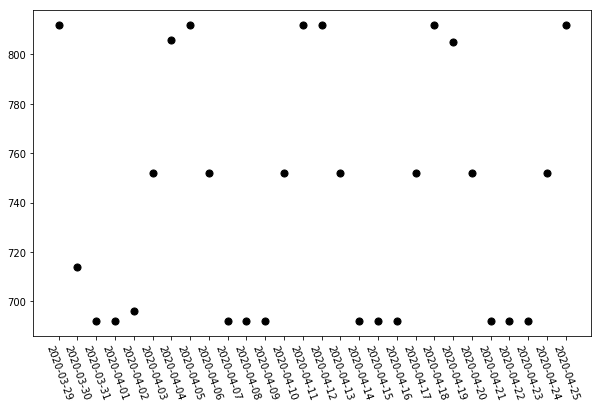

In [73]:
prices = [int(x) for x in list(clean_dictionary['Bucharest'].values())]

r = pyasl.generalizedESD(prices, 3, 0.025, fullOutput=True) 
 
print('Total Outliers:', r[0]) 
 
out_dates = {} 
for i in sorted(r[1]): 
    out_dates.update({list(dates)[i]: list(prices)[i]}) 
 
print('Outlier Dates', out_dates.keys(), '\n') 
print('     R         Lambda') 
 
for i in range(len(r[2])): 
    print('%2d  %8.5f  %8.5f' % ((i+1), r[2][i], r[3][i])) 
 
fig, ax = plt.subplots(figsize=(10,6)) 
plt.scatter(dates, prices, color='black', s=50) 
ax.set_xticklabels(dates, rotation=-70); 
 
for i in range(r[0]): 
    plt.plot(r[1][i], prices[r[1][i]], 'rp')

In [2]:
import numpy as np
import pandas as pd

import datetime
from datetime import date, timedelta
from time import sleep

start_day = '2020-03-29'
end_day = '2020-04-12'

def extract_price_info(start_day, end_day, front_url, middle_url, back_url):
    start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')

    #fare_dict = pd.DataFrame()
    fare_list = []
    
    for i in range(7):
        start = str(start_date).split()[0]
        end = str(end_date).split()[0]
    
        #fare_dict.update({start: {}})
    
        variable_url = front_url + start + middle_url + end + back_url
    
        cards = get_cards_via_soup(variable_url)
        day_dict = {}
        for card in cards:
            city, fare = convert_key_val(card)
            day_dict[city] = int(fare)
        
        series = pd.Series(day_dict)
        df = pd.DataFrame(series, columns=[start])
        fare_list.append(df)
        
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
    
    return fare_list

In [3]:
def convert_key_val(card):
    pre_city = card.select('h3')[0].text
    city = str(pre_city)
    pre_fare = card.select('span[class*=price]')[0].text
    fare = str(pre_fare)
    #Need to do this in order to ensure clean dataframe when concat the series
    if fare == '':
        fare = '0'
    else:   #lets just get the comma and dollar sign out of the way
        fare = (fare.replace(',','').split('$')[1])
    return city, fare

In [4]:
def get_cards_via_soup(variable_url):
    sleep(np.random.randint(3,7))
    
    browser.get(variable_url)
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    return soup.select('div[class*=info-container]')

In [5]:
def combine_days(frame_list, fill_null=True):
    first = frame_list[0]
    
    if (len(frame_list) == 1):
        return first
    
    for x in range(1, len(frame_list)):
        next = frame_list[x]
        frame = pd.concat([first, next], axis=1, sort=False)
        first = frame
    
    return frame.fillna(0)

In [6]:
front = eastern_europe_url['front_url']
middle = eastern_europe_url['middle_url']
back = eastern_europe_url['back_url']
meow_prices = extract_price_info(start_day, end_day, front, middle, back)

NameError: name 'eastern_europe_url' is not defined

In [259]:
meow = combine_days(meow_prices)
meow

,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Prague,685.0,685.0,627.0,677.0,671.0,752.0,835.0
Moscow,637.0,637.0,580.0,579.0,566.0,653.0,682.0
Budapest,707.0,707.0,677.0,711.0,711.0,754.0,758.0
Kyiv,650.0,650.0,636.0,691.0,677.0,677.0,677.0
Warsaw,773.0,773.0,695.0,738.0,738.0,813.0,845.0
Bucharest,713.0,713.0,692.0,692.0,696.0,752.0,812.0
Saint Petersburg,758.0,758.0,599.0,633.0,600.0,675.0,792.0
Kraków,850.0,850.0,710.0,747.0,0.0,816.0,908.0
Sofia,654.0,654.0,612.0,614.0,612.0,645.0,647.0
Chisinau,806.0,806.0,737.0,760.0,0.0,776.0,838.0


In [288]:
meow.iloc[:10, :] #row indexing by number

,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
Prague,685.0,685.0,627.0,677.0,671.0,752.0,835.0
Moscow,637.0,637.0,580.0,579.0,566.0,653.0,682.0
Budapest,707.0,707.0,677.0,711.0,711.0,754.0,758.0
Kyiv,650.0,650.0,636.0,691.0,677.0,677.0,677.0
Warsaw,773.0,773.0,695.0,738.0,738.0,813.0,845.0
Bucharest,713.0,713.0,692.0,692.0,696.0,752.0,812.0
Saint Petersburg,758.0,758.0,599.0,633.0,600.0,675.0,792.0
Kraków,850.0,850.0,710.0,747.0,0.0,816.0,908.0
Sofia,654.0,654.0,612.0,614.0,612.0,645.0,647.0
Chisinau,806.0,806.0,737.0,760.0,0.0,776.0,838.0


In [289]:
row_count = len(meow.index) # to get number of rows
for x in range(row_count):
    hmm = meow.iloc[[x]] #row indexing by title row
    print(hmm)
    break

        2020-03-29  2020-03-30  2020-03-31  2020-04-01  2020-04-02  \
Prague       685.0       685.0       627.0       677.0       671.0   

        2020-04-03  2020-04-04  
Prague       752.0       835.0  


In [286]:
def four_destination_scatter(price_data_frame, destinations):
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    axis_coord = [[0,0], [0,1], [1,0], [1,1]]
    x = 0
    colors = ['green', 'red', 'blue', 'orange']
    for destination in destinations:
        coords = axis_coord[x]
        x_vals = list(price_data_frame.columns)
        y_vals = list(price_data_frame.loc[destination])
        ax[coords[0], coords[1]].scatter(x_vals, y_vals, label = destination, color=colors[x])
        ax[coords[0], coords[1]].set_title("Prices for {}".format(destination))
        ax[coords[0], coords[1]].set_ylim([100,1100])
        x += 1   
    fig.autofmt_xdate()

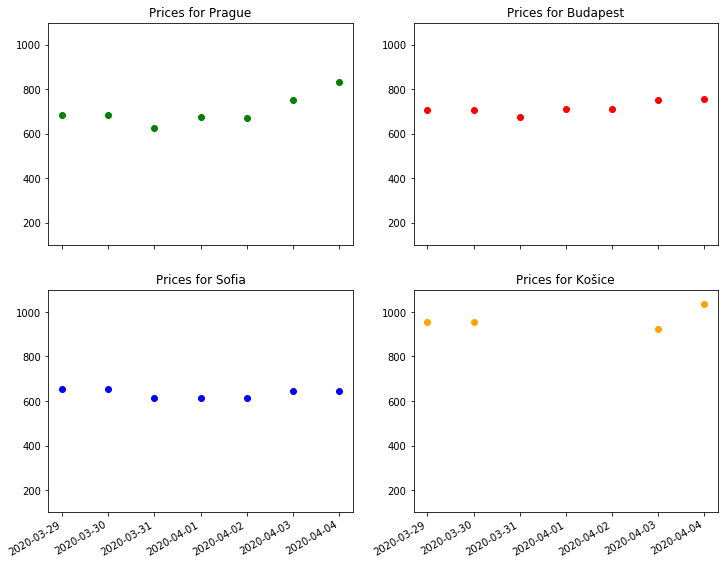

In [287]:
import matplotlib.pyplot as plt
%matplotlib inline
destinations = ["Prague", "Budapest", "Sofia", "Košice"]
four_destination_scatter(meow, destinations)

In [296]:
print("These are the countries for which we were able to pull prices:\n")
print(list(meow.index))

These are the countries for which we were able to pull prices:

['Prague', 'Moscow', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Saint Petersburg', 'Kraków', 'Sofia', 'Chisinau', 'Minsk', 'Riga', 'Vilnius', 'Lviv', 'Wrocław', 'Tallinn', 'Gdańsk', 'Odesa', 'Sochi', 'Bydgoszcz', 'Cluj-Napoca', 'Constanța', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Košice', 'Katowice', 'Samara', 'Kazan', 'Łódź', 'Zaporizhzhia', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu', 'Timișoara', 'Ufa', 'Varna', 'Ulyanovsk', 'Arkhangelsk', 'Debrecen', 'Belgorod', 'Nizhny Novgorod', 'Izhevsk', 'Kaliningrad', 'Makhachkala', 'Palanga', 'Szczecin']


In [43]:
import pandas as pd
oneS = pd.Series(hmm1)
twoS = pd.Series(hmm2)
one  = pd.DataFrame(oneS, columns=['2020-03-29'])
two = pd.DataFrame(twoS, columns=['2020-03-30'])
meow = pd.concat([one, two], axis=1, sort=False)
#meow.fillna(0)